In [1]:
import pink
import tools
import numpy as np

print(pink.__version__)

2.4 revision 82a32d4


In [2]:
import math

som_dim = 2
image_dim = 4
neuron_dim = 4
euclid_dim = 4
#neuron_dim = int(images.shape[1] / math.sqrt(2.0) * 2.0)
#euclid_dim = int(images.shape[1] * math.sqrt(2.0) / 2.0)
number_of_channnels = 2

In [3]:
images = np.zeros((1,number_of_channnels,image_dim,image_dim)).astype(np.float32)
images[0,0,1:3,1:3] = 1
images[0,0,0,0] = 0.5
images[0,0,3,0] = 0.5
images[0,0,0,3] = 0.5
images[0,0,3,3] = 0.5
images[0,1,0,0] = 0.5
images[0,1,3,0] = 0.5
images[0,1,0,3] = 0.5
images[0,1,3,3] = 0.5

print('shape:     ', images.shape)
print('min value: ', np.amin(images))
print('max value: ', np.amax(images))

shape:      (1, 2, 4, 4)
min value:  0.0
max value:  1.0


[[0.5 0.  0.  0.5]
 [0.  1.  1.  0. ]
 [0.  1.  1.  0. ]
 [0.5 0.  0.  0.5]]
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]


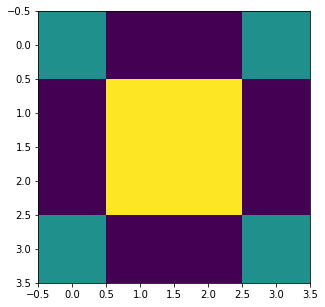

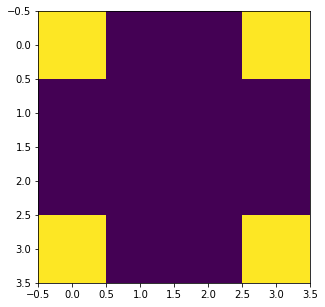

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

print(images[0,0])

plt.figure(figsize=(5,5))
plt.imshow(images[0,0,:,:])

print(images[0,1])

plt.figure(figsize=(5,5))
plt.imshow(images[0,1,:,:])

In [5]:
#np_som = np.random.rand(som_dim, som_dim, neuron_dim, neuron_dim, number_of_channnels).astype(np.float32)
np_som = np.zeros((som_dim, som_dim, number_of_channnels, neuron_dim, neuron_dim)).astype(np.float32)
som = pink.SOM(np_som, neuron_layout="cartesian-3d")

trainer = pink.Trainer(som,
                       number_of_rotations=1,
                       use_flip=False,
                       euclidean_distance_dim=euclid_dim,
                       use_gpu=False,
                       verbosity=1)

In [6]:
from tqdm.notebook import trange, tqdm

for j in trange(1):
    for i in range(images.shape[0]):
        trainer(pink.Data(images[i], layout="cartesian-3d"))

In [7]:
trainer.update_som()
np_som = np.array(som, copy=True)
print(np_som.shape)

(2, 2, 2, 4, 4)


(2, 2, 4, 4)
(2, 4, 2, 4)


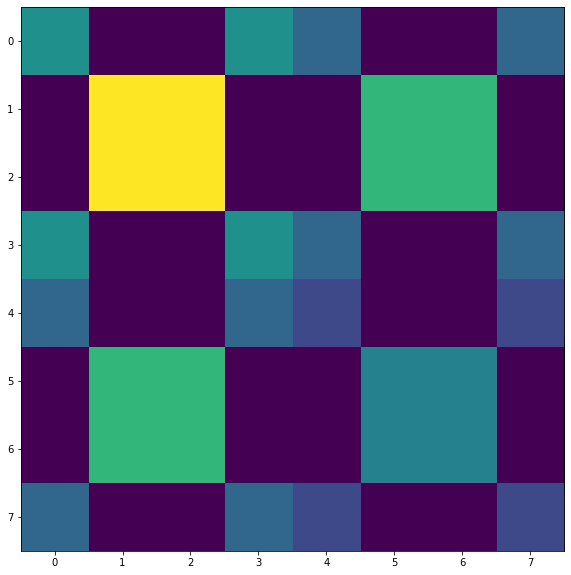

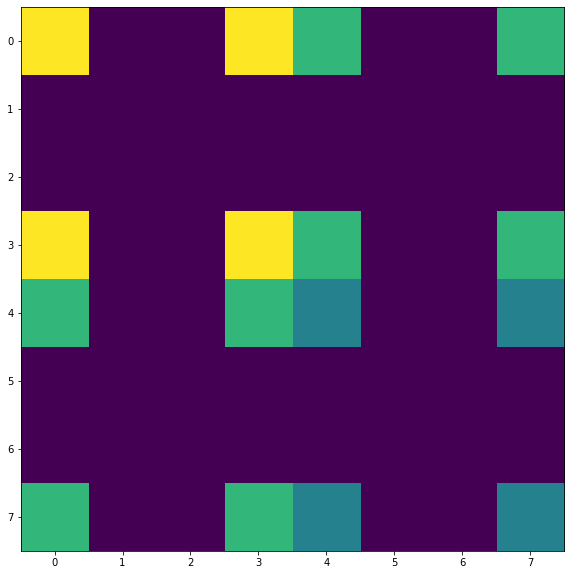

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

print(np_som[:,:,0,:,:].shape)
print(np_som[:,:,0,:,:].swapaxes(1, 2).shape)

plt.figure(figsize=(10,10))
plt.imshow(np_som[:,:,0,:,:].swapaxes(1, 2).reshape((som_dim * neuron_dim, som_dim * neuron_dim)))
plt.grid(False)

plt.figure(figsize=(10,10))
plt.imshow(np_som[:,:,1,:,:].swapaxes(1, 2).reshape((som_dim * neuron_dim, som_dim * neuron_dim)))
plt.grid(False)